In [10]:
def plotForecast(model, series, window_size, plotType='lastWeek'):
    forecast = []
    series = np.array(series)

    for time in range(len(series) - window_size):
        forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

    results = np.array(forecast)[:, 0, 0]

    plt.figure(figsize=(10, 6))

    # Prediction of the next week
    lastWindow = series[len(series)-window_size:]
    lastWindowlist = list(lastWindow)

    nextWeekForecast = []
    for time in range(7):
        nextWeekForecast.append(model.predict(lastWindow[time:time + window_size][np.newaxis]))
        prediction = model.predict(lastWindow[time:time + window_size][np.newaxis])[0,0]
        lastWindow = np.append(lastWindow, prediction)

    results = np.append(results, np.array(nextWeekForecast)[:, 0, 0], axis=0)

    serieslist = list(series)
    resultslist = list(results)
    allserie = serieslist + resultslist[-7:]
    if plotType == 'lastWeek':
        plot_series(range(len(allserie))[-20:], allserie[-20:])
        plot_series(range(len(series) + len(lastWindowlist))[window_size:][-7:], results[-7:])
    elif type(plotType) == int:
        plot_series(range(len(allserie))[-plotType:], allserie[-plotType:])
        plot_series(range(len(series) + len(lastWindowlist))[window_size:][-7:], results[-7:])
    else:
        plot_series(range(len(allserie))[:], allserie[:])
        plot_series(range(len(series) + len(lastWindowlist))[window_size:][:], results[:])

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
print(tf.__version__)
keras=tf.keras

2.6.0


In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def windowed_dataset(series, window_size, batch_size=32, shuffle_buffer=1000):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [3]:
connPur = sqlite3.connect("E:\Faurecia Digital Solutions\F2FI\BackEnd\python\Database\pureSAP.db")
curPur = connPur.cursor()

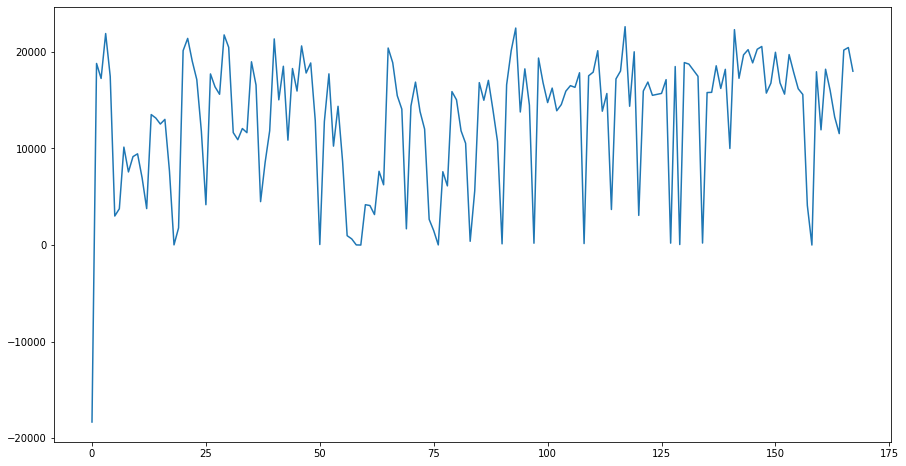

In [23]:
Qty = curPur.execute("SELECT sommes FROM (SELECT SUM(Quantity) as sommes, Article, Projet, Date FROM Prod GROUP BY Date, Projet) WHERE Projet = 'P001' Order BY Date").fetchall()
Qty = [item[0] for item in Qty]
plt.figure(figsize=(15, 8))
plt.plot(Qty[:])
plt.show()

In [5]:
time = range(len(Qty))
series = Qty

# Setting up Prediciton Params
split_time = 120
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 7
batch_size = 100
shuffle_buffer_size = 1000

### 1 Layer & 1NN

In [6]:
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

# Windowing my Train Set
train_set = windowed_dataset(x_train, window_size, 
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# Optimizer: SGD Le loss: Huber  Metric: Mean Average Error MAE
optimizer = keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# KERAS CALLBACK
early_stopping = keras.callbacks.EarlyStopping(patience=10)
history=model.fit(train_set, epochs=200,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/200
2/2 [==============================] - 1s 325ms/step - loss: 23712.3145 - mae: 23712.8145 - val_loss: 26053.4551 - val_mae: 26053.9551
Epoch 2/200
2/2 [==============================] - 0s 36ms/step - loss: 20679.7305 - mae: 20680.2305 - val_loss: 18512.4414 - val_mae: 18512.9414
Epoch 3/200
2/2 [==============================] - 0s 45ms/step - loss: 14606.3809 - mae: 14606.8809 - val_loss: 9070.1611 - val_mae: 9070.6611
Epoch 4/200
2/2 [==============================] - 0s 57ms/step - loss: 7839.2158 - mae: 7839.7158 - val_loss: 7138.9678 - val_mae: 7139.4678
Epoch 5/200
2/2 [==============================] - 0s 49ms/step - loss: 7331.7959 - mae: 7332.2959 - val_loss: 12159.7305 - val_mae: 12160.2305
Epoch 6/200
2/2 [==============================] - 0s 57ms/step - loss: 10310.1426 - mae: 10310.6426 - val_loss: 13997.1191 - val_mae: 13997.6191
Epoch 7/200
2/2 [==============================] - 0s 57ms/step - loss: 11482.0166 - mae: 11482.5166 - val_loss: 12366.3730 - val_m

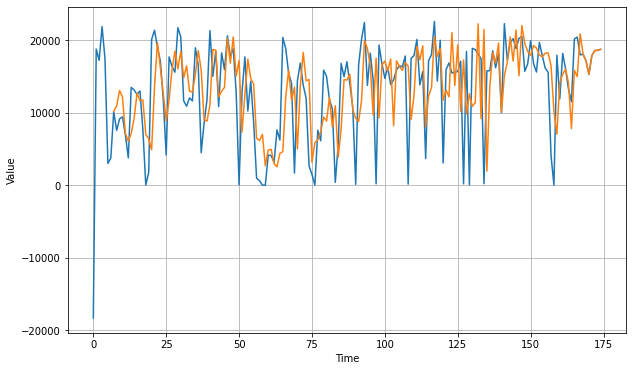

In [11]:
plotForecast(model, series, window_size, plotType="All")

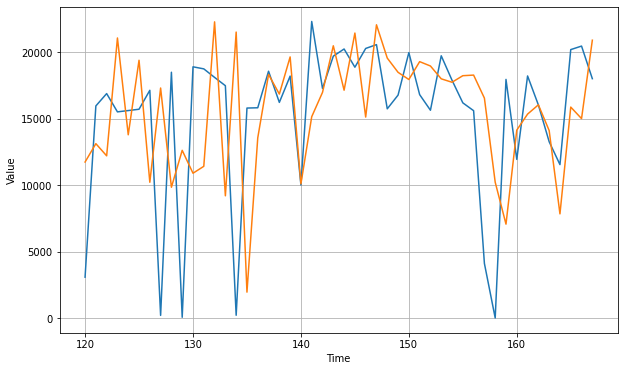

In [12]:
forecast = []
series = np.array(series)

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

results = np.array(forecast)[:, 0, 0]

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

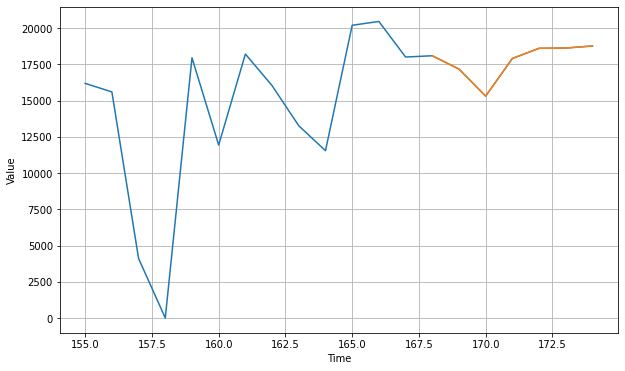

In [13]:
forecast = []
series = np.array(series)

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))

# Prediction of the next week
lastWindow = series[len(series)-window_size:]
lastWindowlist = list(lastWindow)

nextWeekForecast = []
for time in range(7):
  nextWeekForecast.append(model.predict(lastWindow[time:time + window_size][np.newaxis]))
  prediction = model.predict(lastWindow[time:time + window_size][np.newaxis])[0,0]
  lastWindow = np.append(lastWindow, prediction)

results = np.append(results, np.array(nextWeekForecast)[:, 0, 0], axis=0)

serieslist = list(series)
resultslist = list(results)
allserie = serieslist + resultslist[-7:]

plot_series(range(len(allserie))[-20:], allserie[-20:])
plot_series(range(len(series) + len(lastWindowlist))[window_size:][-7:], results[-7:])

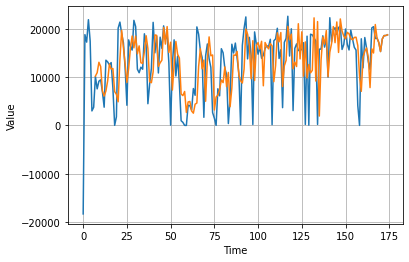

In [14]:
plot_series(range(len(allserie))[:], allserie[:])
plot_series(range(len(series) + len(lastWindowlist))[window_size:][:], results[:])

### Searching for the best Learning Rate

In [61]:
# La seule couche de notre modèle linéaire

l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

# On procède au fenêtrage du Train dataset et Test dataset
train_set = windowed_dataset(x_train, window_size, 
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# L'optimiseur: SGD Le loss: Huber  La métrique: Mean Average Error MAE
optimizer = keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# On peut faire appel au callback LearningRateScheduler pour 
# choisir le meilleur taux d'apprentissage

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-10 * 10**(epoch / 10))

early_stopping = keras.callbacks.EarlyStopping(patience=5)
# On ne vas pas ici utiliser le early_stop
history=model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[lr_schedule])

Epoch 1/500
2/2 [==============================] - 0s 134ms/step - loss: 12877.5234 - mae: 12878.0234 - val_loss: 15604.7285 - val_mae: 15605.2285
Epoch 2/500
2/2 [==============================] - 0s 40ms/step - loss: 12877.3076 - mae: 12877.8076 - val_loss: 15604.0928 - val_mae: 15604.5928
Epoch 3/500
2/2 [==============================] - 0s 49ms/step - loss: 12876.8252 - mae: 12877.3252 - val_loss: 15603.0654 - val_mae: 15603.5654
Epoch 4/500
2/2 [==============================] - 0s 47ms/step - loss: 12876.0186 - mae: 12876.5186 - val_loss: 15601.5918 - val_mae: 15602.0918
Epoch 5/500
2/2 [==============================] - 0s 47ms/step - loss: 12874.9150 - mae: 12875.4150 - val_loss: 15599.5850 - val_mae: 15600.0850
Epoch 6/500
2/2 [==============================] - 0s 57ms/step - loss: 12873.3584 - mae: 12873.8584 - val_loss: 15596.9512 - val_mae: 15597.4512
Epoch 7/500
2/2 [==============================] - 0s 63ms/step - loss: 12871.3682 - mae: 12871.8682 - val_loss: 15593.5156

(1e-06, 0.0001, 0.0, 20000.0)

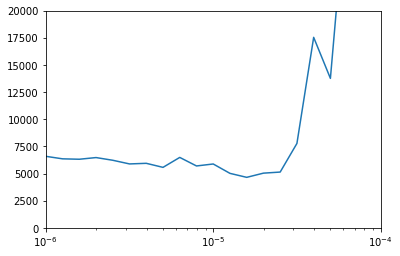

In [63]:
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-10 * 10**(epoch / 10))

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1e-4, 0, 20000])
# history.history['loss'][0]

In [66]:
# The Best Learning Rate is 8e-4
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

optimizer = keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

early_stopping = keras.callbacks.EarlyStopping(patience=10)
# On ne vas pas ici utiliser le early_stop
history=model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
2/2 [==============================] - 0s 137ms/step - loss: 7884.3232 - mae: 7884.8232 - val_loss: 9397.0674 - val_mae: 9397.5674
Epoch 2/500
2/2 [==============================] - 0s 35ms/step - loss: 7762.5991 - mae: 7763.0991 - val_loss: 9082.2549 - val_mae: 9082.7549
Epoch 3/500
2/2 [==============================] - 0s 41ms/step - loss: 7524.4595 - mae: 7524.9595 - val_loss: 8675.8564 - val_mae: 8676.3564
Epoch 4/500
2/2 [==============================] - 0s 49ms/step - loss: 7223.9648 - mae: 7224.4648 - val_loss: 8163.0303 - val_mae: 8163.5303
Epoch 5/500
2/2 [==============================] - 0s 45ms/step - loss: 6900.1924 - mae: 6900.6924 - val_loss: 7576.3071 - val_mae: 7576.8071
Epoch 6/500
2/2 [==============================] - 0s 52ms/step - loss: 6590.6641 - mae: 6591.1641 - val_loss: 7003.8101 - val_mae: 7004.3101
Epoch 7/500
2/2 [==============================] - 0s 61ms/step - loss: 6296.6416 - mae: 6297.1416 - val_loss: 6566.2354 - val_mae: 6566.7354
Epoch

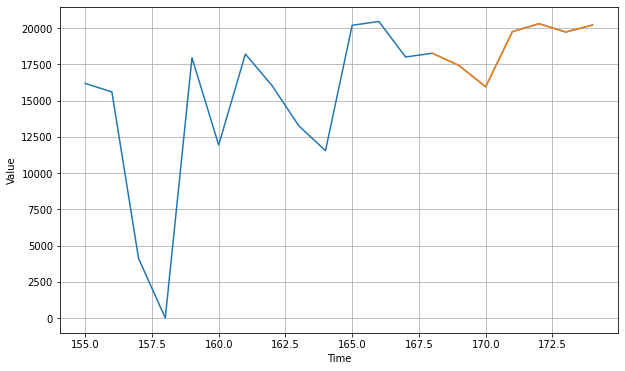

In [67]:
forecast = []
series = np.array(series)

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))

# Prediction of the next week
lastWindow = series[len(series)-window_size:]
lastWindowlist = list(lastWindow)

nextWeekForecast = []
for time in range(7):
  nextWeekForecast.append(model.predict(lastWindow[time:time + window_size][np.newaxis]))
  prediction = model.predict(lastWindow[time:time + window_size][np.newaxis])[0,0]
  lastWindow = np.append(lastWindow, prediction)

results = np.append(results, np.array(nextWeekForecast)[:, 0, 0], axis=0)

serieslist = list(series)
resultslist = list(results)
allserie = serieslist + resultslist[-7:]

plot_series(range(len(allserie))[-20:], allserie[-20:])
plot_series(range(len(series) + len(lastWindowlist))[window_size:][-7:], results[-7:])

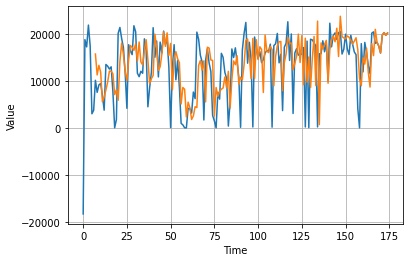

In [68]:
plot_series(range(len(allserie))[:], allserie[:])
plot_series(range(len(series) + len(lastWindowlist))[window_size:][:], results[:])

##### Saving the Trained Model

In [69]:
# model.save("1NN.h5")

### DEEP NEURAL NETWORK MODELS

#### Model 1

In [15]:
time = range(len(Qty))
series = Qty

# Setting up Prediciton Params
split_time = 120
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 7
batch_size = 10
shuffle_buffer_size = 1000

In [16]:
# Le modèle Deep_NN avec 2 couches 10 * 10
model_deepNN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(264, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# On procède au fenêtrage du Train dataset et Test dataset
train_set = windowed_dataset(x_train, window_size, 
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# L'optimiseur: SGD Le loss: Huber  La métrique: Mean Average Error MAE
optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model_deepNN.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# On peut faire appel au callback Keras pour arrêt en cas de non amélioration selon la patience
early_stopping = keras.callbacks.EarlyStopping(patience=50)
history_deepNN=model_deepNN.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

C:\Users\ayaom\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
12/12 [==============================] - 1s 14ms/step - loss: 10249.7021 - mae: 10250.2021 - val_loss: 14566.9258 - val_mae: 14567.4258
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 8583.8301 - mae: 8584.3301 - val_loss: 4879.1333 - val_mae: 4879.6333
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 7780.8442 - mae: 7781.3442 - val_loss: 12947.9297 - val_mae: 12948.4297
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 6464.9722 - mae: 6465.4722 - val_loss: 12949.9111 - val_mae: 12950.4111
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 7698.5752 - mae: 7699.0752 - val_loss: 8920.4971 - val_mae: 8920.9971
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 5406.8325 - mae: 5407.3325 - val_loss: 7307.2471 - val_mae: 7307.7471
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 6083.2842 - mae: 6083.7842 - val_loss: 5469.8022 - val_mae: 

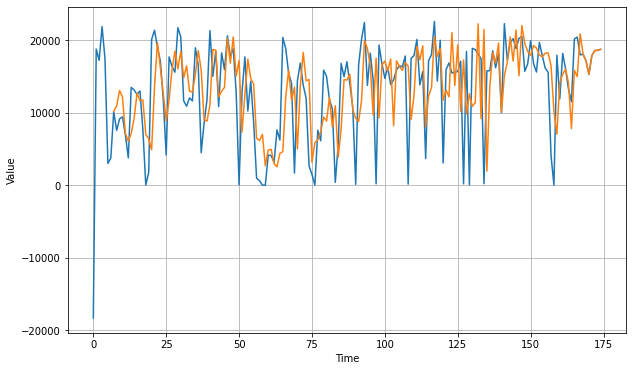

In [17]:
plotForecast(model, series, window_size, 'all')

In [85]:
# Le modèle Deep_NN avec 2 couches 10 * 10
model_deepNN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(264, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# On procède au fenêtrage du Train dataset et Test dataset
train_set = windowed_dataset(x_train, window_size, 
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# L'optimiseur: SGD Le loss: Huber  La métrique: Mean Average Error MAE
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model_deepNN.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-10 * 10**(epoch / 10))

# On peut faire appel au callback Keras pour arrêt en cas de non amélioration selon la patience
early_stopping = keras.callbacks.EarlyStopping(patience=50)
history_deepNN=model_deepNN.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[lr_schedule])

C:\Users\ayaom\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
2/2 [==============================] - 0s 155ms/step - loss: 10001.3242 - mae: 10001.8242 - val_loss: 12235.9541 - val_mae: 12236.4541
Epoch 2/500
2/2 [==============================] - 0s 48ms/step - loss: 10000.9717 - mae: 10001.4717 - val_loss: 12234.8350 - val_mae: 12235.3350
Epoch 3/500
2/2 [==============================] - 0s 56ms/step - loss: 10000.1855 - mae: 10000.6846 - val_loss: 12233.0635 - val_mae: 12233.5635
Epoch 4/500
2/2 [==============================] - 0s 66ms/step - loss: 9998.8809 - mae: 9999.3809 - val_loss: 12230.5469 - val_mae: 12231.0469
Epoch 5/500
2/2 [==============================] - 0s 39ms/step - loss: 9997.1816 - mae: 9997.6816 - val_loss: 12227.2617 - val_mae: 12227.7617
Epoch 6/500
2/2 [==============================] - 0s 65ms/step - loss: 9994.8164 - mae: 9995.3164 - val_loss: 12223.2051 - val_mae: 12223.7051
Epoch 7/500
2/2 [==============================] - 0s 55ms/step - loss: 9991.9131 - mae: 9992.4131 - val_loss: 12217.9414 - val_m

(1e-07, 0.0001, 0.0, 20000.0)

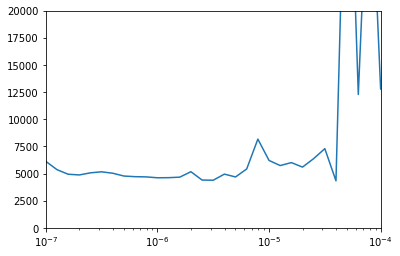

In [87]:
plt.semilogx(history_deepNN.history["lr"], history_deepNN.history["loss"])
plt.axis([1e-7, 1e-4, 0, 20000])

In [95]:
# Le modèle Deep_NN avec 2 couches 10 * 10
model_deepNN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(264, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# On procède au fenêtrage du Train dataset et Test dataset
train_set = windowed_dataset(x_train, window_size, 
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# L'optimiseur: SGD Le loss: Huber  La métrique: Mean Average Error MAE
optimizer = keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model_deepNN.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


# On peut faire appel au callback Keras pour arrêt en cas de non amélioration selon la patience
early_stopping = keras.callbacks.EarlyStopping(patience=50)
history_deepNN=model_deepNN.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
2/2 [==============================] - 1s 163ms/step - loss: 13950.2441 - mae: 13950.7441 - val_loss: 12203.0879 - val_mae: 12203.5879
Epoch 2/500
2/2 [==============================] - 0s 45ms/step - loss: 9485.2822 - mae: 9485.7822 - val_loss: 4658.3496 - val_mae: 4658.8496
Epoch 3/500
2/2 [==============================] - 0s 55ms/step - loss: 5185.1318 - mae: 5185.6318 - val_loss: 8661.9658 - val_mae: 8662.4658
Epoch 4/500
2/2 [==============================] - 0s 43ms/step - loss: 7918.6929 - mae: 7919.1929 - val_loss: 7359.5952 - val_mae: 7360.0952
Epoch 5/500
2/2 [==============================] - 0s 63ms/step - loss: 6759.5273 - mae: 6760.0273 - val_loss: 4474.7041 - val_mae: 4475.2041
Epoch 6/500
2/2 [==============================] - 0s 40ms/step - loss: 4992.5503 - mae: 4993.0503 - val_loss: 6628.2163 - val_mae: 6628.7163
Epoch 7/500
2/2 [==============================] - 0s 60ms/step - loss: 5700.6299 - mae: 5701.1299 - val_loss: 7114.0996 - val_mae: 7114.5996
E

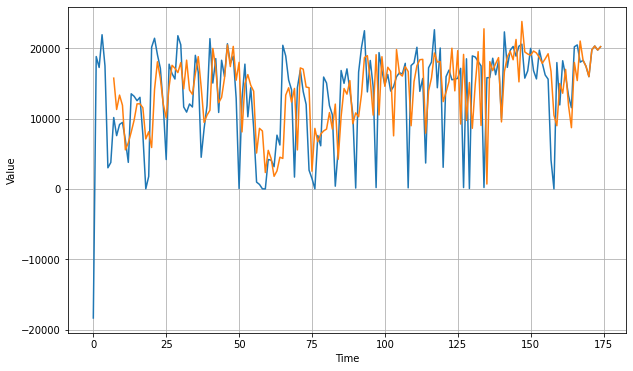

In [89]:
plotForecast(model, series, window_size, 'all')

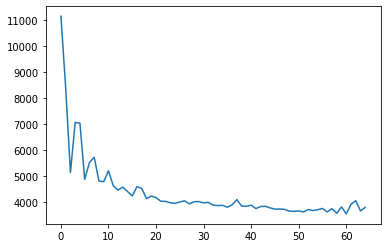

In [93]:
loss_deepNN = history_deepNN.history['loss']
epochs = range(len(loss_deepNN))
plt.plot(epochs, loss_deepNN)
plt.show()

#### Saving the Model

In [91]:
# model_deepNN.save("deepNN1.h5")

### Model 2

In [183]:
# Le modèle Deep_NN avec 2 couches 10 * 10
model_deepNN2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(64, activation="relu"), 
    tf.keras.layers.Dense(128, activation="relu"), 
    tf.keras.layers.Dense(264, activation="relu"), 
    tf.keras.layers.Dense(1024, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# On procède au fenêtrage du Train dataset et Test dataset
train_set = windowed_dataset(x_train, window_size, 
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size,
                             batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

# L'optimiseur: SGD Le loss: Huber  La métrique: Mean Average Error MAE
# optimizer = keras.optimizers.SGD(lr=1e-6, momentum=0.9)
optimizer = keras.optimizers.Adam(lr=1e-2)
model_deepNN2.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


# lr_schedule = keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-12 * 10**(epoch / 10))

# On peut faire appel au callback Keras pour arrêt en cas de non amélioration selon la patience
early_stopping = keras.callbacks.EarlyStopping(patience=40)
history_deepNN2=model_deepNN2.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
12/12 [==============================] - 1s 21ms/step - loss: 8991.9531 - mae: 8992.4531 - val_loss: 5869.1470 - val_mae: 5869.6470
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 5601.8926 - mae: 5602.3926 - val_loss: 7557.7896 - val_mae: 7558.2896
Epoch 3/500
12/12 [==============================] - 0s 9ms/step - loss: 4699.7988 - mae: 4700.2988 - val_loss: 5930.8013 - val_mae: 5931.3013
Epoch 4/500
12/12 [==============================] - 0s 11ms/step - loss: 4717.2036 - mae: 4717.7036 - val_loss: 4709.9902 - val_mae: 4710.4902
Epoch 5/500
12/12 [==============================] - 0s 7ms/step - loss: 4119.7227 - mae: 4120.2227 - val_loss: 4454.4092 - val_mae: 4454.9092
Epoch 6/500
12/12 [==============================] - 0s 12ms/step - loss: 4022.8894 - mae: 4023.3894 - val_loss: 4930.4658 - val_mae: 4930.9658
Epoch 7/500
12/12 [==============================] - 0s 8ms/step - loss: 4636.3730 - mae: 4636.8730 - val_loss: 5727.5024 - val_mae: 5728.0

In [159]:
plt.semilogx(history_deepNN2.history["lr"], history_deepNN.history["loss"])
# plt.axis([1e-12, 1e5, 0, 5000])

KeyError: 'lr'

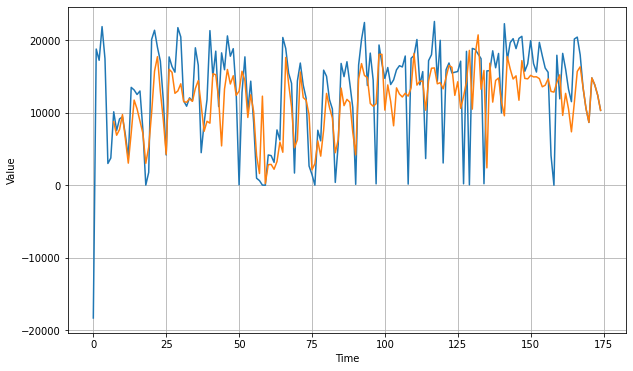

In [177]:
plotForecast(model_deepNN2, series, window_size, 'all')


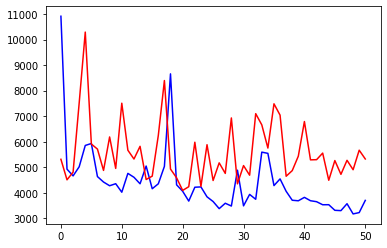

In [178]:
loss_deepNN2 = history_deepNN2.history['loss']
val_loss_deepNN2 = history_deepNN2.history['val_loss']
epochs = range(len(loss_deepNN2))
plt.plot(epochs, loss_deepNN2, 'b')
plt.plot(epochs, val_loss_deepNN2, 'r')
plt.show()

In [179]:
# model_deepNN2.save("modelDeepNN2.h5")

In [4]:
deepModel = tf.keras.models.load_model("E:\Faurecia Digital Solutions\F2FI\BackEnd\python\modelDeepNN2.h5")

In [5]:
deepModel.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_273 (Dense)            (None, 64)                512       
_________________________________________________________________
dense_274 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_275 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_276 (Dense)            (None, 264)               34056     
_________________________________________________________________
dense_277 (Dense)            (None, 1024)              271360    
_________________________________________________________________
dense_278 (Dense)            (None, 1)                 1025      
Total params: 319,433
Trainable params: 319,433
Non-trainable params: 0
_______________________________________________

In [11]:
arrSeries = np.array(series)
deepModel.predict(arrSeries[-window_size:][np.newaxis])

array([[13419.391]], dtype=float32)

In [22]:
Forcast(deepModel, series, window_size)

[array([[13419.391]], dtype=float32),
 array([[10593.839]], dtype=float32),
 array([[8673.241]], dtype=float32),
 array([[14818.32]], dtype=float32),
 array([[13863.9]], dtype=float32),
 array([[12450.067]], dtype=float32),
 array([[10336.121]], dtype=float32)]

In [21]:
def Forcast(model, series, window_size):
    # forecast = []
    series = np.array(series)

    # for time in range(len(series) - window_size):
    #     forecast.append(model.predict(
    #         series[time:time + window_size][np.newaxis]))

    # results = np.array(forecast)[:, 0, 0]

    # plt.figure(figsize=(10, 6))

    # Prediction of the next week
    lastWindow = series[len(series)-window_size:]
    # lastWindowlist = list(lastWindow)

    nextWeekForecast = []
    for time in range(7):
        nextWeekForecast.append(model.predict(
            lastWindow[time:time + window_size][np.newaxis]))
        prediction = model.predict(
            lastWindow[time:time + window_size][np.newaxis])[0, 0]
        lastWindow = np.append(lastWindow, prediction)

    # results = np.append(results, np.array(nextWeekForecast)[:, 0, 0], axis=0)

    # serieslist = list(series)
    # resultslist = list(results)
    # allserie = serieslist + resultslist[-7:]
    # if plotType == 'lastWeek':
    #     plot_series(range(len(allserie))[-20:], allserie[-20:])
    #     plot_series(range(len(series) + len(lastWindowlist))[window_size:][-7:], results[-7:])
    # elif type(plotType) == int:
    #     plot_series(range(len(allserie))[-plotType:], allserie[-plotType:])
    #     plot_series(range(len(series) + len(lastWindowlist))
    #                 [window_size:][-7:], results[-7:])
    # else:
    #     plot_series(range(len(allserie))[:], allserie[:])
    #     plot_series(range(len(series) + len(lastWindowlist))
    #                 [window_size:][:], results[:])
    return nextWeekForecast


### The BEST MODEL

In [18]:
def seq2seq_window_dataset(series, window_size, batch_size=32,
                           shuffle_buffer=1000):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [19]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# window_size = 64
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=10)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=10)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
optimizer = keras.optimizers.Adam(lr=3e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
history = model.fit(train_set, epochs=500,
                    validation_data=valid_set,
                    callbacks=[early_stopping, model_checkpoint])

C:\Users\ayaom\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
12/12 [==============================] - 2s 36ms/step - loss: 12000.9912 - mae: 12001.4893 - val_loss: 15068.3799 - val_mae: 15068.8779
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 11827.4883 - mae: 11827.9883 - val_loss: 14811.3506 - val_mae: 14811.8506
Epoch 3/500
12/12 [==============================] - 0s 8ms/step - loss: 11553.9941 - mae: 11554.4932 - val_loss: 14358.0088 - val_mae: 14358.5088
Epoch 4/500
12/12 [==============================] - 0s 8ms/step - loss: 11058.7168 - mae: 11059.2158 - val_loss: 13493.9668 - val_mae: 13494.4658
Epoch 5/500
12/12 [==============================] - 0s 9ms/step - loss: 10154.2285 - mae: 10154.7285 - val_loss: 11887.4717 - val_mae: 11887.9717
Epoch 6/500
12/12 [==============================] - 0s 8ms/step - loss: 8629.0986 - mae: 8629.5977 - val_loss: 8886.2832 - val_mae: 8886.7842
Epoch 7/500
12/12 [==============================] - 0s 9ms/step - loss: 6587.5757 - mae: 6588.0757 - val_loss: 6812.5737